In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

In [2]:
pic = Image.open('mypic.jpg')
pic.size

(764, 900)

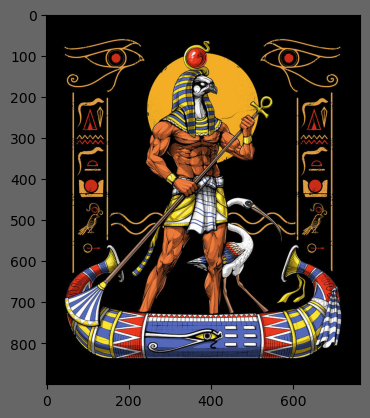

In [3]:
plt.figure(facecolor='0.4')
plt.imshow(pic)
#plt.plot([0,969],[120, 120], 'r')
#plt.plot([0,969],[480, 480], 'r')
#plt.axvline(x=300,color='black')
#plt.axvline(x=650,color='black')

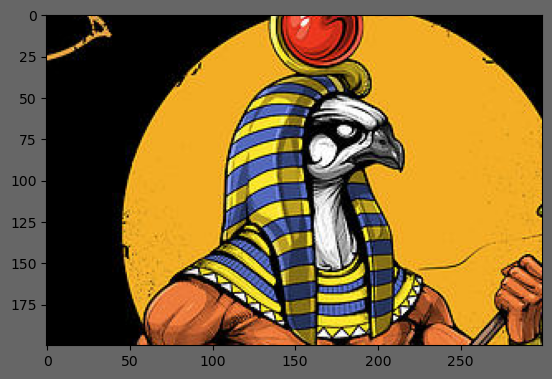

In [4]:
crop = pic.crop((200,100,500,300))
plt.figure(facecolor='0.4')
plt.imshow(crop)

In [5]:
array = np.array(pic)
#array

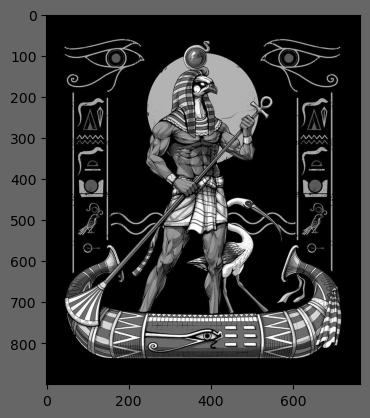

In [6]:
picBW = pic.convert('L')
plt.figure(facecolor='0.4')
plt.imshow(picBW, cmap='gray')
plt.show()

In [7]:
mpic = np.array(picBW)

#this might be a little confusing...
mpic.shape, picBW.size

((900, 764), (764, 900))

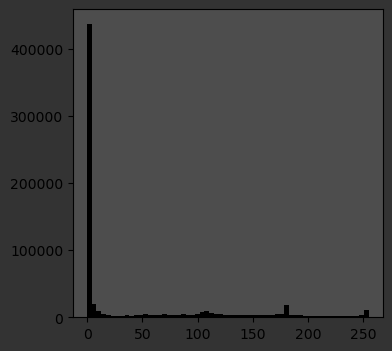

In [8]:
pixels = mpic.flatten()

plt.figure(facecolor='0.2',figsize=(4,4))
plt.axes().set_facecolor('0.3')
plt.hist(pixels, 60, color='black')
plt.show()

In [9]:
A1 = np.random.randint(1,100,16)

print(A1)
print(A1[::2])
print(A1[1::2])

[ 4 56 38 10 15 67 75 58 34 14 44 21 80 45 11 55]
[ 4 38 15 75 34 44 80 11]
[56 10 67 58 14 21 45 55]


In [10]:
b = (A1[::2] + A1[1::2]) / 2
b

array([30. , 24. , 41. , 66.5, 24. , 32.5, 62.5, 33. ])

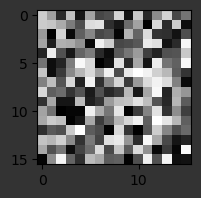

In [11]:
np.random.seed(5)
A = np.random.randint(1,100,16*16)
B = A.reshape(16,16)

plt.figure(facecolor='0.2',figsize=(2,2))
plt.imshow(B, cmap=cm.gray)

In [12]:
mean = np.zeros((4,4))

In [13]:
mean += B[::4,::4] #add all values of the blocks into the representing pixels of mean
mean += B[1::4,0::4]
mean += B[::4,1::4]
mean += B[1::4,1::4]
mean /= (mean.shape[0]*mean.shape[1]) #divide each pixel of mean by its amount of pixels to get the average 

C = np.zeros((16,16))

C[0::4,0::4] = mean #this works because it will create a view of C with the shape of the selected slice
print(C)            #which is the same shape as mean

C[0::4,0::4].shape, mean.shape

[[18.4375  0.      0.      0.     11.75    0.      0.      0.      8.8125
   0.      0.      0.     14.6875  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.    ]
 [ 9.8125  0.      0.      0.     16.5625  0.      0.      0.     11.5625
   0.      0.      0.     11.375   0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      

((4, 4), (4, 4))

In [14]:
for i in range(4):
    for j in range(4):
        B[j::4,i::4] = mean
        
print(mean)
print('')
print(B)

[[18.4375 11.75    8.8125 14.6875]
 [ 9.8125 16.5625 11.5625 11.375 ]
 [12.8125  8.0625 15.125   9.9375]
 [12.4375 12.5625 15.75   14.0625]]

[[18 18 18 18 11 11 11 11  8  8  8  8 14 14 14 14]
 [18 18 18 18 11 11 11 11  8  8  8  8 14 14 14 14]
 [18 18 18 18 11 11 11 11  8  8  8  8 14 14 14 14]
 [18 18 18 18 11 11 11 11  8  8  8  8 14 14 14 14]
 [ 9  9  9  9 16 16 16 16 11 11 11 11 11 11 11 11]
 [ 9  9  9  9 16 16 16 16 11 11 11 11 11 11 11 11]
 [ 9  9  9  9 16 16 16 16 11 11 11 11 11 11 11 11]
 [ 9  9  9  9 16 16 16 16 11 11 11 11 11 11 11 11]
 [12 12 12 12  8  8  8  8 15 15 15 15  9  9  9  9]
 [12 12 12 12  8  8  8  8 15 15 15 15  9  9  9  9]
 [12 12 12 12  8  8  8  8 15 15 15 15  9  9  9  9]
 [12 12 12 12  8  8  8  8 15 15 15 15  9  9  9  9]
 [12 12 12 12 12 12 12 12 15 15 15 15 14 14 14 14]
 [12 12 12 12 12 12 12 12 15 15 15 15 14 14 14 14]
 [12 12 12 12 12 12 12 12 15 15 15 15 14 14 14 14]
 [12 12 12 12 12 12 12 12 15 15 15 15 14 14 14 14]]


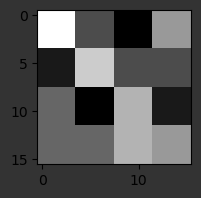

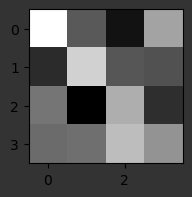

In [15]:
plt.figure(facecolor='0.2',figsize=(2,2))
plt.imshow(B, cmap=cm.gray)
plt.show()
plt.figure(facecolor='0.2',figsize=(2,2))
plt.imshow(mean, cmap=cm.gray)
plt.show() #mean and B will now look the same but B has more Pixels

In [16]:
def blocks(x,y):
    pic = Image.open('mypic.jpg').convert('L')
    w, h = pic.size
    w = (w // x) * x
    h = (h // y) * y
    pic = pic.crop((0, 0 , w, h))
    pixels = np.array(pic)
    means = np.zeros((h // y, w // x))
    for i in range(x):
        for j in range(y):
            means += pixels[j::y, i::x]
    means /= (x * y) 
    for i in range(x):
        for j in range(y):
            pixels[j::y, i::x] = means
    plt.figure(facecolor='0.2',figsize=(4,4))
    plt.imshow(pixels,cmap=cm.gray)
    plt.show()

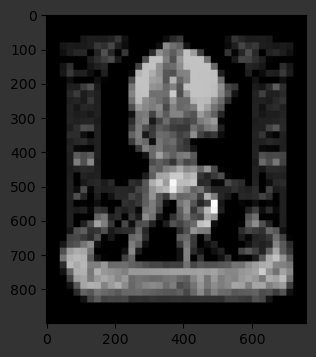

In [17]:
blocks(20,20)

In [18]:
a = [[1,2,3], [4,5,6], [7,8,9]]

list(map(list, zip(*a))), [list(i) for i in (zip(*a))]

([[1, 4, 7], [2, 5, 8], [3, 6, 9]], [[1, 4, 7], [2, 5, 8], [3, 6, 9]])

In [19]:
import scipy.signal
from scipy.stats import norm
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter

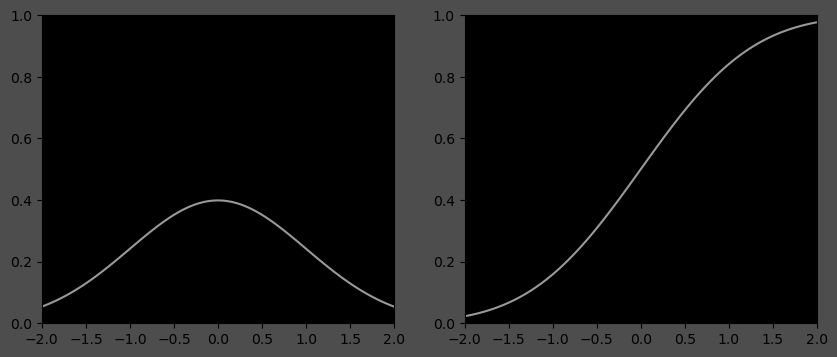

In [20]:
x_ = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1, 2, figsize=(10, 4),facecolor= '0.3')
for i in range(2):
    ax[i].set_facecolor('black')
    ax[i].axis([-2,2,0,1])
ax[0].plot(x_, norm.pdf(x_),color='0.6')
ax[1].plot(x_, norm.cdf(x_),color='0.6')
plt.show()

In [21]:
def GaussKernel(size):
    x = norm.pdf(np.linspace(-2, 2, size))
    y = np.outer(x, x)
    return y / y.sum()

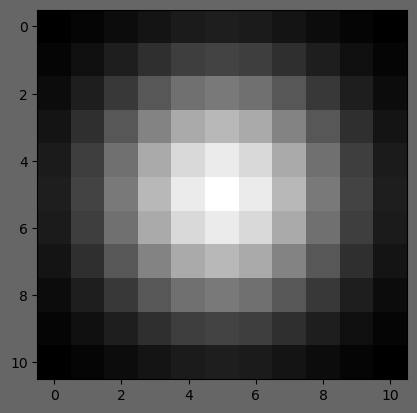

In [22]:
plt.figure(facecolor='0.4')
plt.imshow(GaussKernel(11),cmap=cm.gray)

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
X, Y = np.meshgrid(x, y)
Z = GaussKernel(20)

In [26]:
# fig = plt.figure(facecolor='0.4')
# ax = fig.gca(projection = '3d')
# ax.set_facecolor('0.2')
# ax.plot_surface(X, Y, Z,color='black')
# plt.show()

In [27]:
pic2 = Image.open('mypic.jpg').convert('L')

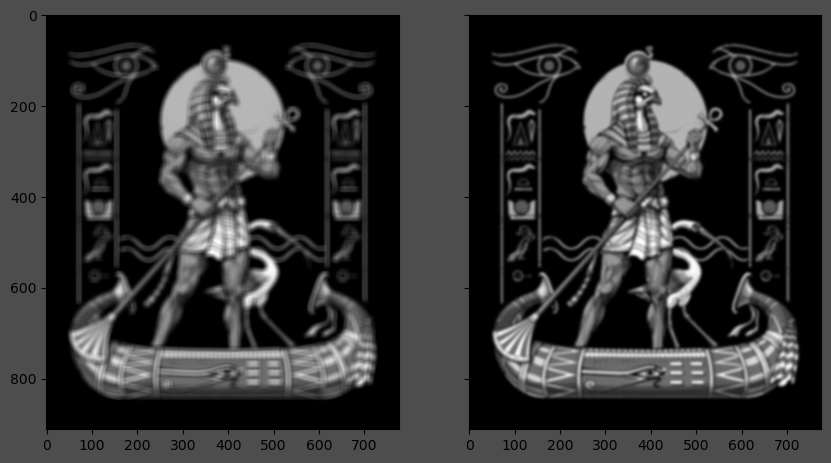

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6),facecolor= '0.3',sharey=True)
ax[0].imshow(scipy.signal.convolve2d(pic2, np.ones((13,13)) / 169), cmap=cm.gray)
ax[1].imshow(scipy.signal.convolve2d(pic2, GaussKernel(13)), cmap=cm.gray)
plt.show()

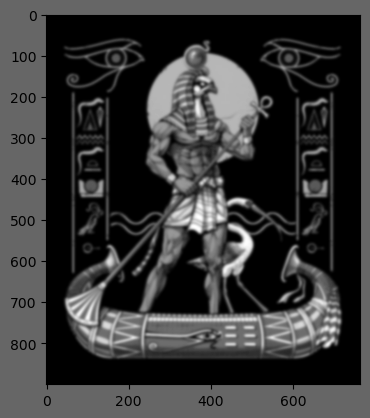

In [29]:
plt.figure(facecolor='0.4')
plt.imshow(gaussian_filter(pic2, 3), cmap=cm.gray)

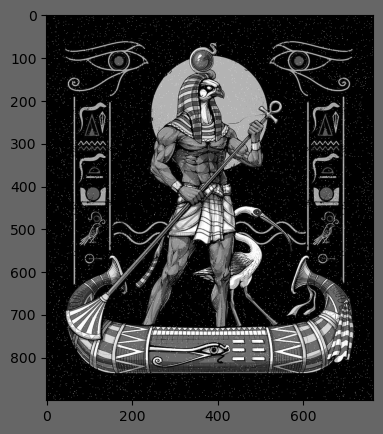

In [30]:
noise = np.random.uniform(size=(900,764))
picNoisy = np.where(noise > 0.99, 255, pic2)
plt.figure(facecolor='0.4',figsize=(5,5))
plt.imshow(picNoisy, cmap=cm.gray)

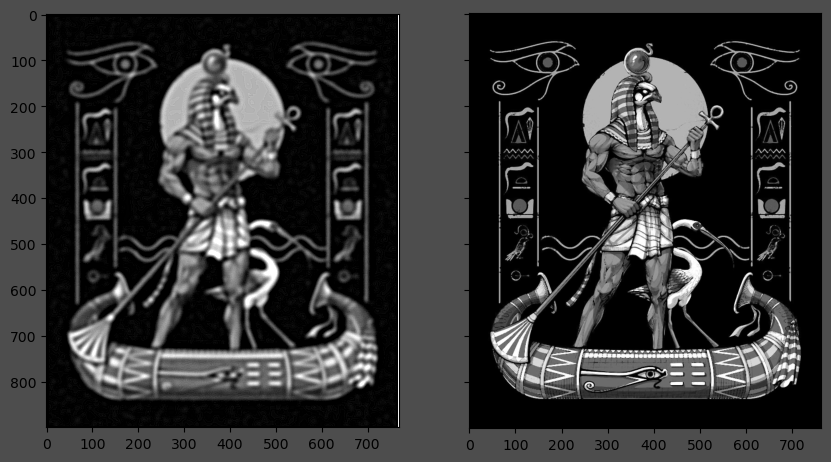

In [31]:
sharpen = np.full((5,5), -1, 'float')
sharpen[2, 2] = 25
inverted_img = 255 - picNoisy
cleaned = gaussian_filter(inverted_img, 5)
cleanandsharp = scipy.signal.convolve2d(cleaned, sharpen)
reinverted_img = 255 - cleanandsharp
median_cleaned = median_filter(picNoisy, size=3)

fig, ax = plt.subplots(1, 2, figsize=(10, 6),facecolor= '0.3',sharey=True)
ax[0].imshow(reinverted_img, cmap=cm.gray,vmin=0, vmax=255)
ax[1].imshow(median_cleaned, cmap=cm.gray)
plt.show()

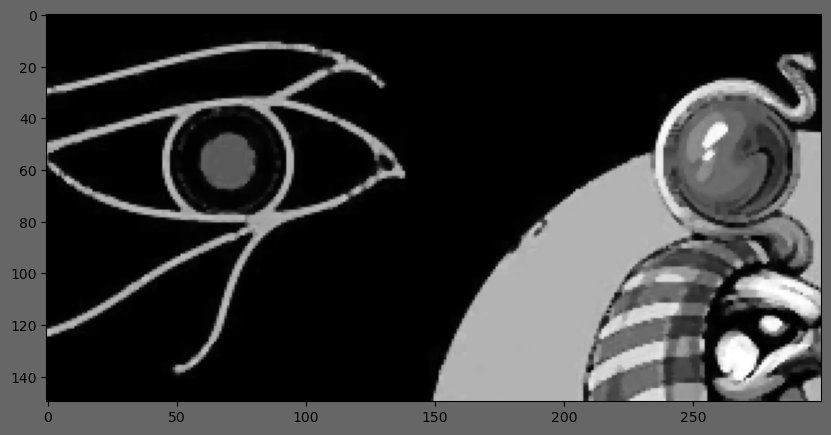

In [41]:
plt.figure(facecolor='0.4',figsize=(10,10))

pic_ = Image.fromarray(median_cleaned)
pic__ = pic_.crop((100,50,400,200))
plt.imshow(pic__, cmap=cm.gray)